<img src="https://blog.udacity.com/wp-content/uploads/2019/03/480-white.png" style="float: left; margin: 50px; height: 85px">
<img src="https://seeklogo.com/images/M/misk-academy-logo-77B2EA3795-seeklogo.com.png" style="float: right; margin: 50px; height: 85px">

---

# Project 2: Investigate TMDb Movies Dataset

> ###### Prepared By: Nuha Alrashed
> ###### Email: nuha.alraashed@gmail.com
> June, 2021

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

---

<a id='intro'></a>
## Introduction

> The primary goal of the project is to go through the dataset and the general data analysis process using several packages. TMDb movies dataset contains information about 10,000 movies collected from The Movie Database (TMDb), including user ratings and revenue.


In [1]:
# Packages used in this investigation: 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

<a id='wrangling'></a>
## Data Wrangling


### General Properties

In [2]:
# importing dataset from CSV file:

df = pd.read_csv('tmdb-movies.csv')

In [3]:
# Checking the data:
df.head(3)

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08


> Both 'genre' and 'cast' columns are seperated by pipe "|" characters, we **may need to separate** the data for further analysis

In [4]:
# Performing operations to inspect data:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10866 non-null  int64  
 1   imdb_id               10856 non-null  object 
 2   popularity            10866 non-null  float64
 3   budget                10866 non-null  int64  
 4   revenue               10866 non-null  int64  
 5   original_title        10866 non-null  object 
 6   cast                  10790 non-null  object 
 7   homepage              2936 non-null   object 
 8   director              10822 non-null  object 
 9   tagline               8042 non-null   object 
 10  keywords              9373 non-null   object 
 11  overview              10862 non-null  object 
 12  runtime               10866 non-null  int64  
 13  genres                10843 non-null  object 
 14  production_companies  9836 non-null   object 
 15  release_date       

> We can observe the whole dataframe through using **info()**

> There are **21 columns** within the dataframe, **10866 total entries**, some columns are containing **missing** values.

> 'release_date' and 'release_year' both need to change their dtypes into datetime. 

In [5]:
# to see what can we calculate from this dataframe
df.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


> As can be seen in the table above: Python has calculated the **'id' column**, the reason for that is 'id' displayed as int type. this column **will not affect our analysis**.

In [6]:
# As observed before, this dataset contains missing values. 
# We want to see what columns have nulls and how many nulls are there.
df.isnull().sum()

id                         0
imdb_id                   10
popularity                 0
budget                     0
revenue                    0
original_title             0
cast                      76
homepage                7930
director                  44
tagline                 2824
keywords                1493
overview                   4
runtime                    0
genres                    23
production_companies    1030
release_date               0
vote_count                 0
vote_average               0
release_year               0
budget_adj                 0
revenue_adj                0
dtype: int64

> So, we have **'imdb_id'**, **'cast'**, **'homepage'**, **'director'**, **'tagline'**, **'keywords'**, **'overview'**, 
> **'genres'**, **'production_companies'**

> Total of 9 columns out of 21

In [7]:
# We want to see if we have any duplicated data: 
sum(df.duplicated())

1

> We only have one row which is duplicated, we can simply drop it from our data frame. 

---

### Data Cleaning

##### Summary of what need to be done: 
- Separate 'cast' and 'genres' data into multiple rows.
- Fill in nulls.
- Drop duplicated rows. 
- Change data type of date columns

#### (1) Separating 'genres' and 'cast' data into multiple rows

In [8]:
# separating 'genres' data into multiple rows, and assigning a new column called 'genre' in the data frame. 
df = df.drop('genres', axis=1).join(df['genres'].str.split('|', expand=True).stack().reset_index(level=1, drop=True).rename('genre'))
# separating 'cast' data into multiple rows, and assigning a new column called 'movie_cast' in the data frame. 
df = df.drop('cast', axis=1).join(df['cast'].str.split('|', expand=True).stack().reset_index(level=1, drop=True).rename('movie_cast'))

In [9]:
df[['genre','movie_cast']].head(2)
# our code is correct

,genre,movie_cast
0,Action,Chris Pratt
0,Action,Bryce Dallas Howard


#### (2) Fill in nulls: 

> imdb_id, cast, homepage, director, tagline, keywords, overview, genres, production_companies. **Keep in mind: genres has been changed into genre, cast changed into movie_cast**

> **imdb_id**: we cannot assume the ids. so, will remain unfilled. However, id does not affect the analysis.

> <span style='color:#FF0000' > **cast** </span>: since we splitted the cast column into multiple rows to process with the analysis, 
> we're going to fill the missing values with "Unspecified" 

> **homepage**: it is the link for the movie page, can remain unfilled.

> **director**: we can ask for more data about the missing values, but can remain unfilled since 
> our analysis is not concerned with directors.

> **tagline**: tags associated with the movie, can remain unfilled.

> **keywords**: keywords about the movie storyline, can remain unfilled.

> **overview**: a brief description regarding the movie, can remain unfilled. 

> <span style='color:#FF0000' > **genre** </span>: since we splitted the genres columns into multiple rows to process with the analysis, 
> we're going to fill the missing values with "Unspecified"

> **production_companies**: the organization responsiple for producing the movie, but can remain unfilled since 
> our analysis is not concerned with companies.

In [10]:
# filling 'genre' with unspecified for null values.
df['genre'] = df['genre'].fillna('Unspecified')
# filling 'movie_cast' with unspecified for null values.
df['movie_cast'] = df['movie_cast'].fillna('Unspecified')

In [11]:
# checking if no null values are in genre column
df['genre'].isnull().sum()
# output gives us 'genre' as 0, so the null values are filled with the value we want.

0

In [12]:
# checking if no null values are in movie_cast column
df['movie_cast'].isnull().sum()
# output gives us 'movie_cast' as 0, so the null values are filled with the value we want.

0

#### (3) drop duplicated rows

In [13]:
# since we have one duplicated row, we will drop it with the method drop_duplicates
df.drop_duplicates(inplace=True)

# to check if our row is dropped
sum(df.duplicated())

0

#### (4) change data type of dates

In [14]:
# changing data type from string and int to datetime
df['release_date'] = pd.to_datetime(df['release_date'])

---
<a id='eda'></a>
## Exploratory Data Analysis


### Is the Films/Movies industry making profit over the years?

In [15]:
# let's first create a new column to calculate the profits for each movie, by substracting budget from revenue
df['profit'] = df["revenue"] - df["budget"]
df['profit']
# the column is now created. 

0        1363528810
0        1363528810
0        1363528810
0        1363528810
0        1363528810
            ...    
10865        -19000
10865        -19000
10865        -19000
10865        -19000
10865        -19000
Name: profit, Length: 131811, dtype: int64

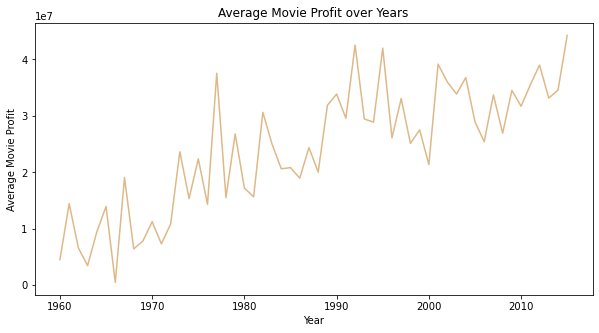

In [16]:
# finding the average profit for each year
profit_year = df.groupby('release_year')['profit'].mean()

# visualize the relationship between 'release_year' and  and the new column 'profit', and customize the graph
profit_year.plot(kind='line', title='Average Movie Profit over Years', figsize = (10,5), color="#DEB887")

# Labeling axis
plt.xlabel('Year')
plt.ylabel('Average Movie Profit');

> As shown in the graph above; the films industry's profit is increasing. Even when there is a small fall from time to time, the profit line goes back to the top. 

> The reason could be that people tend to spend more time on watching movies. Thus, more profit.

> Plus, watching movies became easier than before, people can watch their favorite shows via online platforms which require a subscription fee. 

### Which are top 5 years have the highest number of released movies?


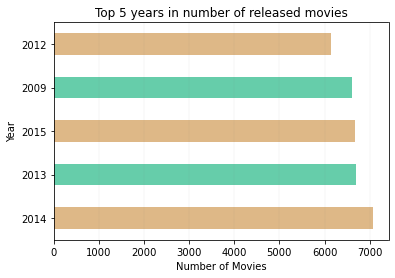

In [17]:
# we want to count how many movies are released in each year, then only show the top 5, and assign colors to the bars

df['release_year'].value_counts().head(5).plot(kind='barh', color=['#DEB887', '#66CDAA'])

# Set a title for the graph
plt.title('Top 5 years in number of released movies')

# Assign labels
plt.ylabel('Year')
plt.xlabel('Number of Movies')

# add and customize grid lines
plt.grid(axis = 'x', color = 'grey', linestyle = '--', linewidth = 0.1)

# resize the figure
plt.rcParams["figure.figsize"] = (9,6)

plt.show()

> In the graph above; we can clearly see that 2014 has the highest number of released movies among all years. In the second place comes 2015, then 2013, 2009 and lastly 2012. 

> We can investigate deeper in the data to see what causes year 2014 to be the top. A reason could be high number of available directors and actors. 

---

### Which movies are the most popular of all time?

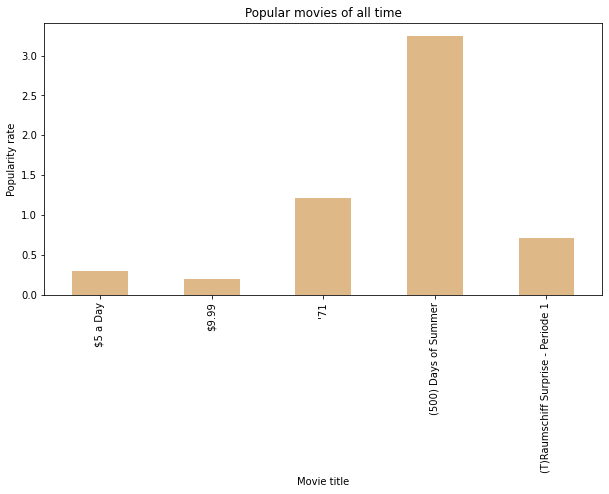

In [42]:
# First, we want to group the rows with the same title in one cell, to see each movie's popularity rate
popular_movie = df.groupby('original_title')['popularity'].max().head()

# Then, visualize the top 5 titles with a bar chart
popular_movie.plot(kind='bar', title='Popular movies of all time', figsize = (10,5), color="#DEB887")
plt.ylabel('Popularity rate')
plt.xlabel('Movie title');

> As shown above: "500 days of summer" is the most popular among all the movies in our list, "71'" comes after.

---

### Which genres are the most popular of all time?

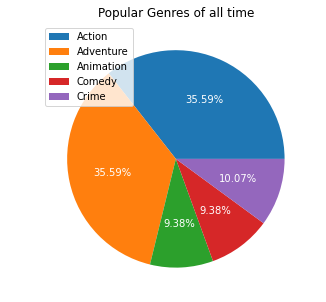

In [93]:
# First, we want to group the rows with the same title in one cell, to see each movie's popularity rate
popular_movie = df.groupby('genre')['popularity'].max().head()

# visualize the top 5 titles with a pie chart
popular_movie.plot(kind='pie', figsize = (10,5), autopct='%1.2f%%', textprops=dict(color="w"))
# Add legends
plt.legend(loc='upper left')
# to eliminate the y axis
plt.ylabel('')
# add a title
plt.title('Popular Genres of all time');

> As can be noticed in the created graph: Both Action and Advnture genres has the same popularity rate or perhaps a small difference between them is present. 

---

## What's the preferred runtime for movies? 

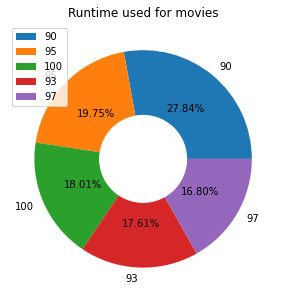

In [99]:
# we want to count how many movies for each runtime, then only show the top 5 with a percentage to distinguish which 
# run time is higher.

df['runtime'].value_counts().head(5).plot(kind='pie', autopct='%1.2f%%', figsize = (10,5),)

# Display legeneds
plt.legend(loc='upper left')

# to eliminate the y axis
plt.ylabel('')

# add a circle at the center to transform it in a donut chart
my_circle=plt.Circle( (0,0), 0.4, color='white')
p=plt.gcf()
p.gca().add_artist(my_circle)

#Set a title for the graph
plt.title('Runtime used for movies');

> We can clearly see, the runtime of 90 minutes is the preferred time to run a certain movie based on the past movies data. 

---

## Which director has the highest number of movies? 

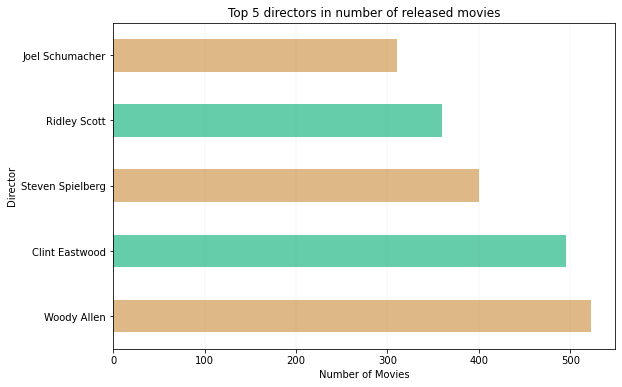

In [103]:
# Counting the number of movies for each director, then only show the top 5, and assign colors to the bars

df['director'].value_counts().head(5).plot(kind='barh', color=['#DEB887', '#66CDAA'])

# Set a title for the graph
plt.title('Top 5 directors in number of released movies')

# Assign labels
plt.ylabel('Director')
plt.xlabel('Number of Movies')

# add and customize grid lines
plt.grid(axis = 'x', color = 'grey', linestyle = '--', linewidth = 0.1)

# resize the figure
plt.rcParams["figure.figsize"] = (9,6)

plt.show()

> As shown in the graph above: Woody Allen has the highest number of released movies. Thus, he has his reputation within the
> movies and films industry.

---

<a id='conclusions'></a>
## Conclusion
> This analysis was made for the purpose of exploring data. Thus, we answered the following questions: is movies industry is making any profits over the years? Which are top 5 years have the highest number of released movies? Which movies are the most popular of all time? Which genres are the most popular of all time? What's the preferred runtime for movies? And Which director has the highest number of movies? 

> We found out the amount of profit is increasing year by year. Even if there was any fall between years, the number is still increasing. 

> Also, in 2014 the number of released movies is the highest, and we assumed the reason is the availability of directors and actors. We can investigate more into the data to find out what could actually be the cause. 

> As for which movie and genre are the most popular, we got the movie "500 days of summer" and both genres "Action" and "Adventure" to be the top of the list. 

> The most used (or preferred) runtime for movies is 90 minutes. it was based on the filmmakers preference.

> Woody Allen, is the only director in our list with a number of movies of over 500 releases.

## Limitations

> There were a few limitations in order to complete this project

> Personal reasons includes a minimum of free time to work on the project.
> The project was challenging, because I needed some time to find the methods to write an appropriate code. 

> Overall, this project made me discover new ways of writing python codes to explore the datasets! Many thanks for the Udacity team :)